# Week 05_Question_01
### Author : Bemnet Girma
### Roll No. 2164006
### KiiT University, Bhubanewar
### Program : MTech in Data Analytics
### Subject : Business Analytics Intelligence
### Lab Assignment Week Five

In [1]:
#for array
import numpy as np
#for dataset
import pandas as pd
#for visualization
import matplotlib.pyplot as plt

In [9]:
#Create dataset
data = { 'weight': [51, 62, 69, 64, 65, 56, 58, 57, 55],
        'height': [167, 182, 176, 173, 172, 174, 169, 173, 170],
       'class': ['Under weight', 'Normal', 'Normal', 'Normal', 'Normal', 'Under weight', 'Normal', 'Normal', 'Normal']}

# Calling DataFrame constructor
df = pd.DataFrame(data)
df

,weight,height,class
0,51,167,Under weight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,56,174,Under weight
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal


In [10]:
#overview of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weight  9 non-null      int64 
 1   height  9 non-null      int64 
 2   class   9 non-null      object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [11]:
#dimension of dataset
df.shape

(9, 3)

In [12]:
#overview of number of non-nan records in a column
df.count()

weight    9
height    9
class     9
dtype: int64

In [13]:
#numerical data statistical summary
df.describe()

,weight,height
count,9.000000,9.000000
mean,59.666667,172.888889
std,5.700877,4.371626
min,51.000000,167.000000
25%,56.000000,170.000000
50%,58.000000,173.000000
75%,64.000000,174.000000
max,69.000000,182.000000


In [14]:
#categorical data group summary of a column
df["class"].value_counts()

Normal          7
Under weight    2
Name: class, dtype: int64

In [18]:
#percentage distribution of each unique data in a column
df["class"].value_counts(normalize=True)

Normal          0.777778
Under weight    0.222222
Name: class, dtype: float64

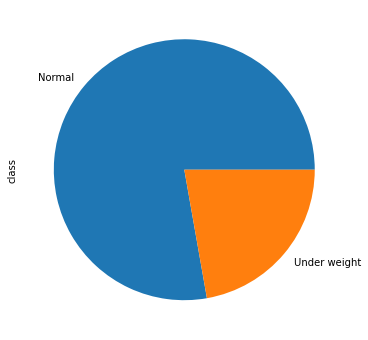

In [19]:
#visualize % distribution of each unique data in a column using pie chart
df["class"].value_counts(normalize=True).plot(kind="pie", figsize=(6,6))
plt.show()

In [20]:
#detecting missing data from the whole dataset
df.isnull().sum().sum()

0

In [21]:
#detecting duplicated data
df[df.duplicated()]

,weight,height,class


In [23]:
df0 = df[df["class"] == "Normal"]
df1 = df[df["class"] == "Under weight"]

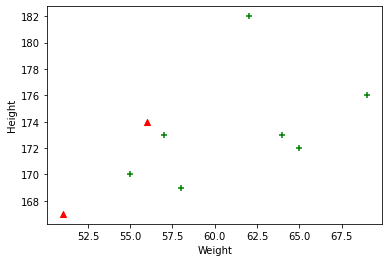

In [25]:
#visualize with scatter plot
plt.xlabel('Weight')
plt.ylabel('Height')
plt.scatter(df0["weight"], df0["height"], color="green", marker='+')
plt.scatter(df1["weight"], df1["height"], color="red", marker='^')

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis = 'columns')
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
len(X_train)

7

In [28]:
len(X_test)

2

In [31]:
#train using KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
model.predict(X_test)

array(['Normal', 'Normal'], dtype=object)

In [33]:
model.score(X_test, y_test)

1.0

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2]], dtype=int64)

Text(42.0, 0.5, 'Truth')

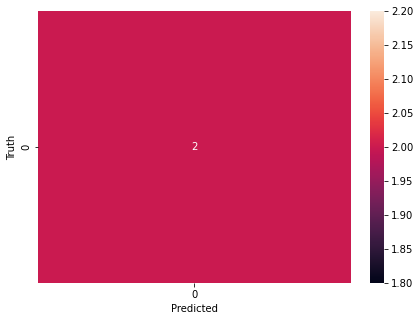

In [35]:
#visualize confusion matrix
%matplotlib inline
import seaborn as sn
plt.figure(figsize = (7, 5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
sample_data = {"weight": [53], "height":[175]}
single_test = pd.DataFrame(sample_data)

In [40]:
model.predict(single_test)

array(['Normal'], dtype=object)